# <center> Task 'A'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import linear_model

In [3]:
def draw_line(coef,intercept, mi, ma,a,b,auc):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # min=0 and max=1
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1],color=a,label='accuarcy ='+str(auc))
    plt.legend()
    plt.title(b)

In [16]:
clf.coef_

array([[-12.24577774, -11.55139718]])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ration between positive and negative is 100 : 2, in the 2nd data its 100:20, in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different learning rates [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and         jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper and atach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

# <center>  TASK 1: SVM

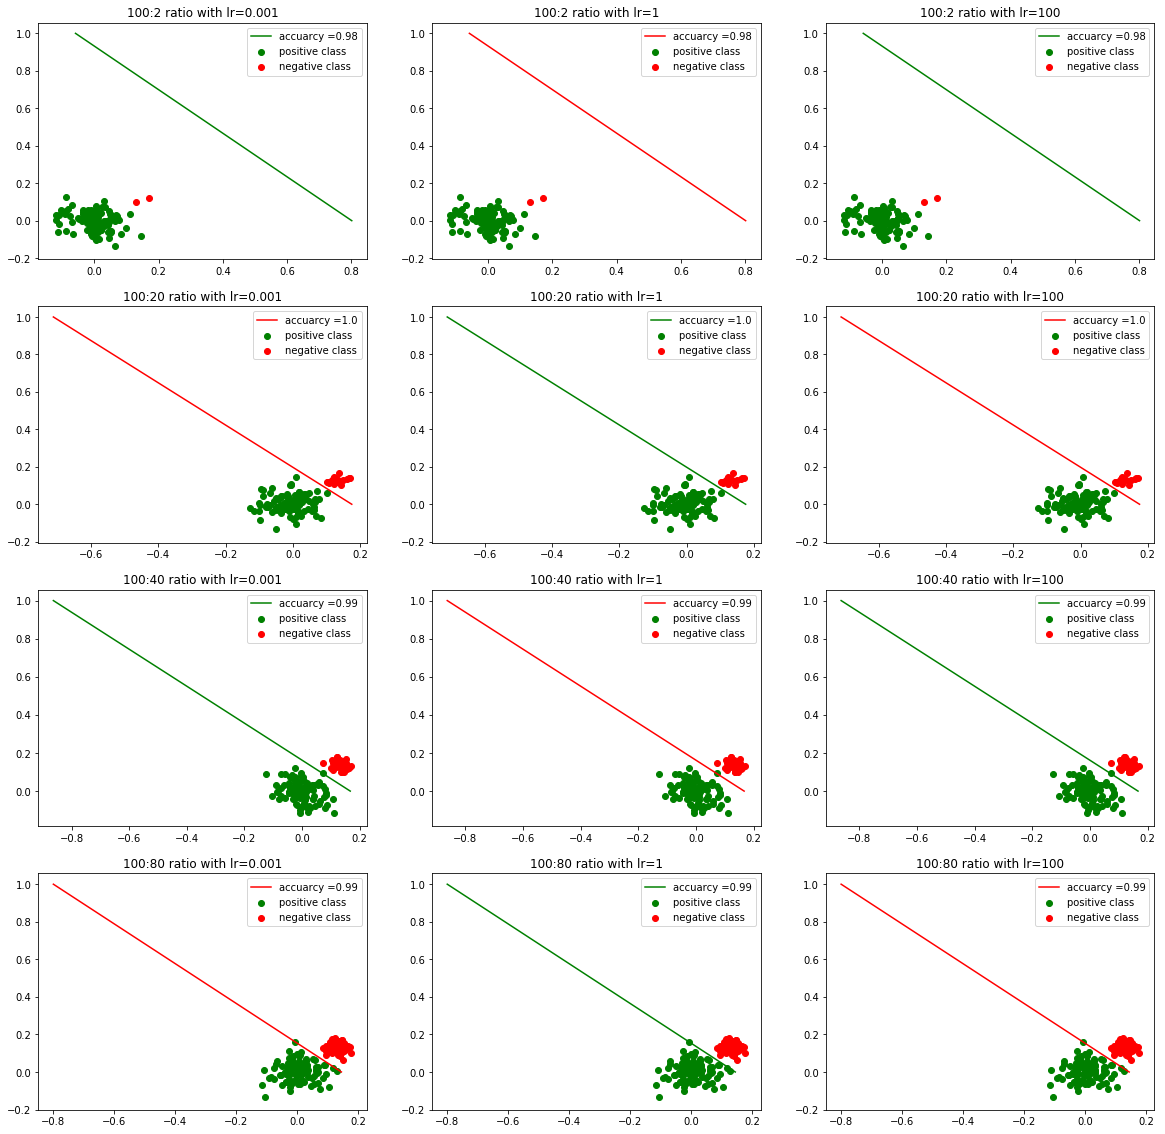

In [12]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
mi=0
ma=1
a=0
colors=['g','r','g','r','g','r','g','r','g','r','g','r']
title=['100:2 ratio with lr=0.001','100:2 ratio with lr=1','100:2 ratio with lr=100'
,'100:20 ratio with lr=0.001','100:20 ratio with lr=1','100:20 ratio with lr=100'
,'100:40 ratio with lr=0.001','100:40 ratio with lr=1','100:40 ratio with lr=100'
,'100:80 ratio with lr=0.001','100:80 ratio with lr=1','100:80 ratio with lr=100']
lr=[0.001,1,100]
for j,i in enumerate(ratios):
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    y_pred=np.array(len(y))
    for r in lr:
        plt.subplot(4, 3, a+1)
        
        plt.scatter(X_p[:,0],X_p[:,1],color='green',label='positive class')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='negative class')
        plt.legend()
        clf = linear_model.SGDClassifier(eta0=r, alpha=0.001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
        clf.fit(X,y)
        y_pred=clf.predict(X)
        auc=accuracy_score(y, y_pred)
        auc=np.round(auc,2)
        coef=[]
        for f in range(2):
            coef.append(clf.coef_[0][f])
        draw_line(coef,clf.intercept_,mi,ma,colors[a],title[a],auc)
        a+=1

plt.show()

# <center> INTERPRETATION ABOUT THE HYPERPLANE

# The position of hyperplane for the ratio [100:2](HIGHLY IMBALANCED) shows that, our model is a 'DUMB MODEL' even for varying learning rates[0.001,1,100]
# The hyperplane for the ratio [100:20] shows that, our model can classify correctly with all the varying learning rates, with auc =0.98
# The hyperplane for the ratio [100:40] shows that, our model can classify correctly with all the varying learning rates, with auc =0.94
# The hyperplane for the ratio [100:80] shows that, our model can classify correctly with all the varying learning rates, with auc =0.98

# <center> TASK 2 : LOGISTIC REGRESSION

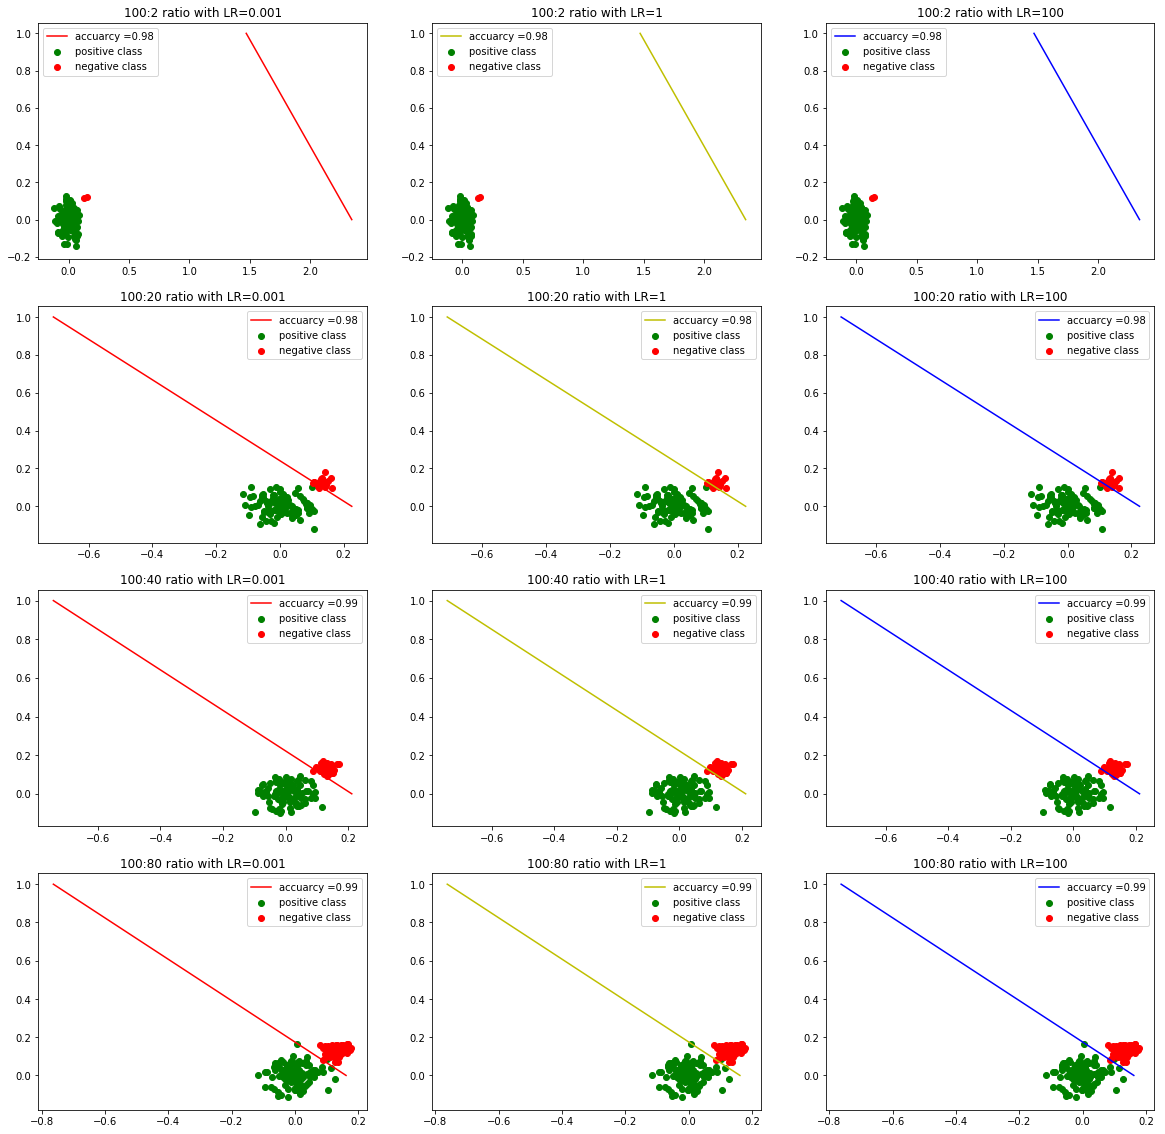

In [77]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
mi=0
ma=1
a=0
lr=[0.001,1,100]
y_pred=np.array(len(y))
for j,i in enumerate(ratios):
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for r in lr:
        plt.subplot(4, 3, a+1)
        
        plt.scatter(X_p[:,0],X_p[:,1],color='green',label='positive class')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='negative class')
        plt.legend()
        clf = linear_model.SGDClassifier(eta0=r, alpha=0.001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
        clf.fit(X,y)
        y_pred=clf.predict(X)
        coef=[]
        auc=accuracy_score(y, y_pred)
        auc=np.round(auc,2)
        for f in range(2):
            coef.append(clf.coef_[0][f])
        draw_line(coef,clf.intercept_,mi,ma,colors[a],title[a],auc)
        a+=1

plt.show()

# <center>INTERPRETATION

<img src=https://i.imgur.com/nvlc8Xi.jpg>

<img src='https://i.imgur.com/r8FOsFh.jpg'>

<img src='https://i.imgur.com/2QBOPTW.jpg'>